In [19]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from nibabel.testing import data_path
import nibabel as nib
import random 

from batchgenerators.transforms import Compose, MirrorTransform
from batchgenerators.transforms.crop_and_pad_transforms import CenterCropTransform, RandomCropTransform
from batchgenerators.transforms.spatial_transforms import ResizeTransform, SpatialTransform
from batchgenerators.transforms.utility_transforms import NumpyToTensor
from batchgenerators.dataloading.multi_threaded_augmenter import MultiThreadedAugmenter


from batchgenerators.dataloading.data_loader import DataLoaderBase, SlimDataLoaderBase

In [20]:
# Function to generate 
# and append them  
# start = starting range, 
# end = ending range 
# num = number of  
# elements needs to be appended 
def Rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res 
  
# Driver Code 
num = 10
start = 20
end = 40
print(Rand(start, end, num)) 

[29, 20, 26, 24, 24, 37, 38, 27, 34, 24]


In [21]:
def getImageDimention(basePath,filename):
        filename = os.path.join(basePath, filename)
        print(" \t File Name : "+filename)
        imageName = nib.load(filename)
       # print(" Image Shape :")
       # print(imageName.shape)
        return imageName.shape

In [22]:
def plot_Slices(imageList):
    img_Size = len(imageList)
    plt.figure(figsize=(16, 10))
    for i in range(img_Size):
        plt.subplot(1, img_Size, i+1)
        plt.imshow(imageList[i], cmap="gray") # only grayscale image here
    plt.show()

In [23]:
def plot_batch(batch):
    batch_size = batch['data'].shape[0]
    plt.figure(figsize=(16, 10))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i+1)
        plt.imshow(batch['data'][i, 0], cmap="gray") # only grayscale image here
    plt.show()

In [24]:
def reshape(orig_img, append_value=-1024, new_shape=(512, 512, 512)):
    reshaped_image = np.zeros(new_shape)
    reshaped_image[...] = append_value
    x_offset = 0
    y_offset = 0  # (new_shape[1] - orig_img.shape[1]) // 2
    z_offset = 0  # (new_shape[2] - orig_img.shape[2]) // 2

    reshaped_image[x_offset:orig_img.shape[0]+x_offset, y_offset:orig_img.shape[1]+y_offset, z_offset:orig_img.shape[2]+z_offset] = orig_img
    # insert temp_img.min() as background value

    return reshaped_image

In [25]:
class DataLoader(DataLoaderBase):
    def __init__(self, data, BATCH_SIZE=2, num_batches=None, seed=False):
        super(DataLoader, self).__init__(data, BATCH_SIZE, num_batches, seed) 
        # data is now stored in self._data.
    
    def generate_train_batch(self):
        # usually you would now select random instances of your data. We only have one therefore we skip this
        img = self._data
        
        # The camera image has only one channel. Our batch layout must be (b, c, x, y). Let's fix that
        img = np.tile(img[None, None], (self.BATCH_SIZE, 1, 1, 1))
        
        # now construct the dictionary and return it. np.float32 cast because most networks take float
        return {'data':img.astype(np.float32), 'some_other_key':'some other value'}

In [26]:

#multithreaded_generator = MultiThreadedAugmenter(batchgen1, all_transforms, 4, 2, seeds=None)

In [27]:
def getImageSlice(directoryPath):
    fileList = os.listdir(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    print(" DTYPE : ",type(medicalImage_data))
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    index = Rand(0,z-1,4)
    print("z: "+str(z))
    print(index)
    ind = int(z/2)
    #random.sample(range(1, z), 1)

    length = len(medicalImage_data.shape)
    if(length<4):
        #ind = random.sample(range(1, z), 1)
        imgSlice = medicalImage_data[: ,: ,ind]
    else :
        t = imgShape[3]
        imgSlice = medicalImage_data[: ,: ,ind,t-4]
        
        
    #batchgen = DataLoader(imgSlice, 4, None, False)
    #batch = next(batchgen)
    #plot_batch(batch)
    return imgSlice

In [37]:
def getImageSliceList(directoryPath,ch):
    imgSlice = []
    fileList = os.listdir(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    #print(" DTYPE : ",type(medicalImage_data)," Shape : ",str(medicalImage_data.shape))
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    start  = z*30//100
    end    = z*70//100  
    index = Rand(start,end,5)
    index.sort()
    print(" Shape : ",str(medicalImage_data.shape) ,"Slice Index Selected : ",index)

    
    for i in index:
        length = len(medicalImage_data.shape)
        if(length<4):
            imgSlice.append(medicalImage_data[: ,: ,i])
        else :
            t = imgShape[3]
            imgSlice.append(medicalImage_data[: ,: ,i,ch])
        
        
    #batchgen = DataLoader(imgSlice, 4, None, False)
    #batch = next(batchgen)
    #plot_batch(batch)
    return imgSlice

In [45]:
traindata = "imagesTr"
testdata = "imagesTs"
labeldata ="labelsTr"

In [44]:
def getImageLabelSliceList(directoryPath,ch):
    imgSlice = []
    labelSlice =[]
    
    fileList = os.listdir(os.path.join(directoryPath) # dir is your directory path
    fileCount = len(fileList)
    #print(getImageDimention(test_dir_path,test_list[1]))
    #for i in random.sample(range(1, fileCount), 3):
    temp_Path = directoryPath+fileList[1]
    print(temp_Path)
    medicalImage = nib.load(temp_Path)
    medicalImage_data = medicalImage.get_fdata()
    #print(" DTYPE : ",type(medicalImage_data)," Shape : ",str(medicalImage_data.shape))
    imgShape = medicalImage_data.shape
    x = imgShape[0]
    y = imgShape[1]
    z = imgShape[2]
    start  = z*30//100
    end    = z*70//100  
    index = Rand(start,end,5)
    index.sort()
    print(" Shape : ",str(medicalImage_data.shape) ,"Slice Index Selected : ",index)

    
    for i in index:
        length = len(medicalImage_data.shape)
        if(length<4):
            imgSlice.append(medicalImage_data[: ,: ,i])
        else :
            t = imgShape[3]
            imgSlice.append(medicalImage_data[: ,: ,i,ch])
        
        
    #batchgen = DataLoader(imgSlice, 4, None, False)
    #batch = next(batchgen)
    #plot_batch(batch)
    return imgSlice

E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [54, 79, 82, 95, 100]


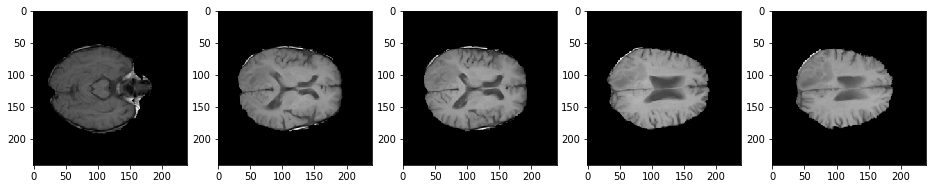

In [38]:
imagePath = "E:/IIITB/MedicalImagingDecathalon/"
traindata = "imagesTr"
testdata = "imagesTs"
labeldata ="labelsTr"


imgList = getImageLabelSliceList("E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour",1)
#print(" Shape of getImageSliceList : ",str(len(imgList)))
plot_Slices(imgList)

E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [46, 55, 57, 57, 90]


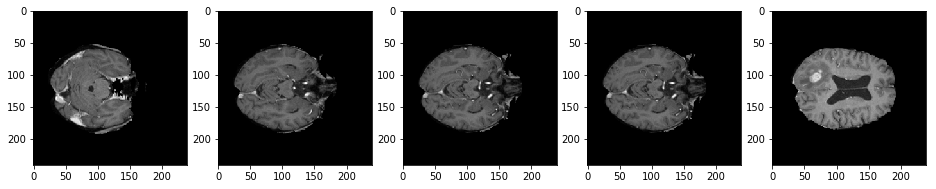

In [39]:
imgList = getImageSliceList("E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/",2)
#print(" Shape of getImageSliceList : ",str(len(imgList)))
plot_Slices(imgList)

E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [67, 80, 82, 99, 101]


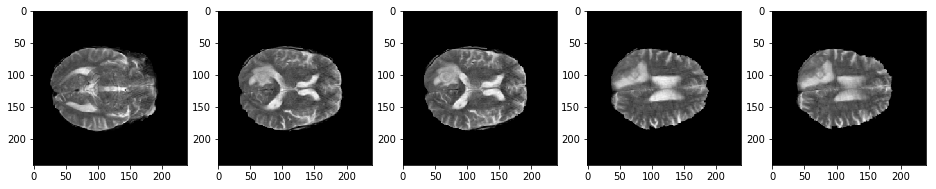

In [40]:
imgList = getImageSliceList("E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/",3)
#print(" Shape of getImageSliceList : ",str(len(imgList)))
plot_Slices(imgList)

E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/BRATS_002.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [63, 73, 89, 96, 100]


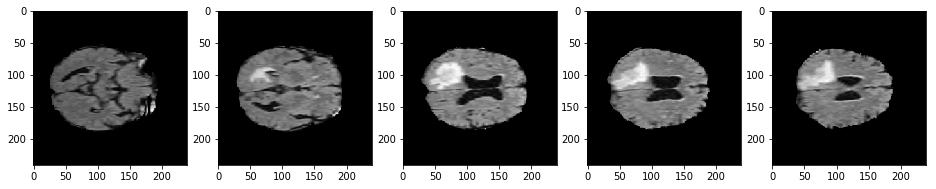

In [42]:
imgList = getImageSliceList("E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTr/",0)
#print(" Shape of getImageSliceList : ",str(len(imgList)))
plot_Slices(imgList)

E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTs/BRATS_486.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [58, 60, 75, 97, 107]
 Shape of getImageSliceList :  5


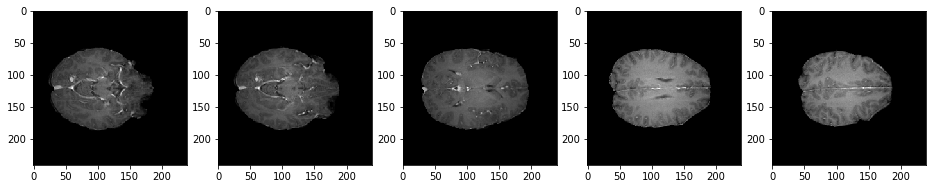

In [34]:
imgList = getImageSliceList("E:/IIITB/MedicalImagingDecathalon/Task01_BrainTumour/imagesTs/")
print(" Shape of getImageSliceList : ",str(len(imgList)))
plot_Slices(imgList)

['Task07_Pancreas', 'Task08_HepaticVessel', 'Task06_Lung', 'Task09_Spleen', 'Task01_BrainTumour', 'Task03_Liver', 'Task05_Prostate', 'Task10_Colon', 'Task02_Heart', 'Task04_Hippocampus']


---------- Task07_Pancreas ------------------ 
	 Training Data Count : 282
	 Test Data Count: 139
/home/ramesh/Desktop/WS/DecathalonDataset/Task07_Pancreas/imagesTr/pancreas_242.nii.gz
 Shape :  (512, 512, 101) Slice Index Selected :  [36, 37, 52, 56, 57]


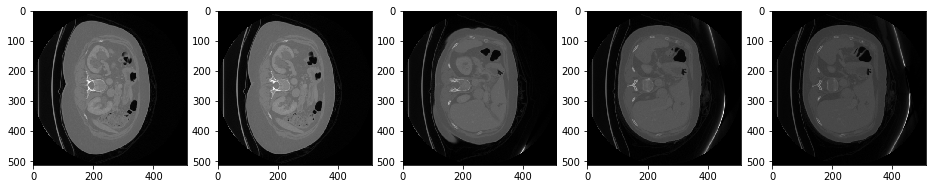

---------- Task08_HepaticVessel ------------------ 
	 Training Data Count : 303
	 Test Data Count: 140
/home/ramesh/Desktop/WS/DecathalonDataset/Task08_HepaticVessel/imagesTr/hepaticvessel_119.nii.gz
 Shape :  (512, 512, 43) Slice Index Selected :  [16, 21, 22, 29, 30]


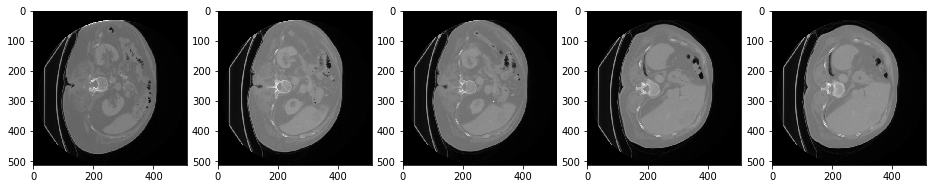

---------- Task06_Lung ------------------ 
	 Training Data Count : 63
	 Test Data Count: 32
/home/ramesh/Desktop/WS/DecathalonDataset/Task06_Lung/imagesTr/lung_015.nii.gz
 Shape :  (512, 512, 277) Slice Index Selected :  [83, 118, 125, 132, 184]


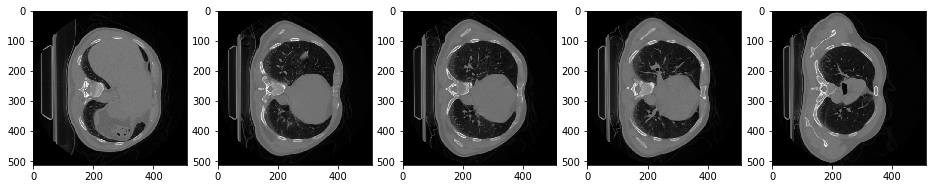

---------- Task09_Spleen ------------------ 
	 Training Data Count : 41
	 Test Data Count: 20
/home/ramesh/Desktop/WS/DecathalonDataset/Task09_Spleen/imagesTr/spleen_13.nii.gz
 Shape :  (512, 512, 77) Slice Index Selected :  [28, 41, 41, 47, 53]


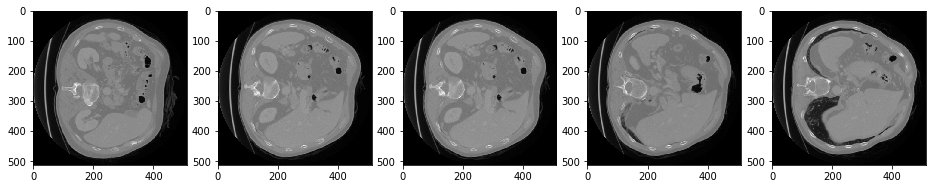

---------- Task01_BrainTumour ------------------ 
	 Training Data Count : 484
	 Test Data Count: 266
/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTr/BRATS_303.nii.gz
 Shape :  (240, 240, 155, 4) Slice Index Selected :  [59, 60, 63, 79, 98]


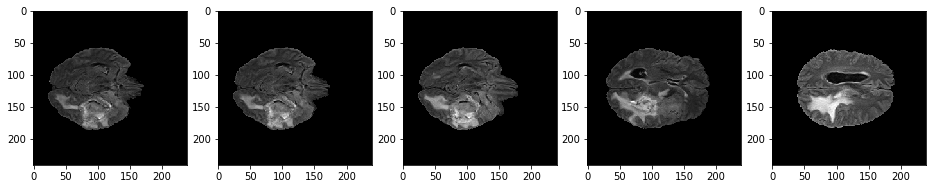

---------- Task03_Liver ------------------ 
	 Training Data Count : 262
	 Test Data Count: 140
/home/ramesh/Desktop/WS/DecathalonDataset/Task03_Liver/imagesTr/liver_24.nii.gz
 Shape :  (512, 512, 276) Slice Index Selected :  [82, 124, 156, 181, 193]


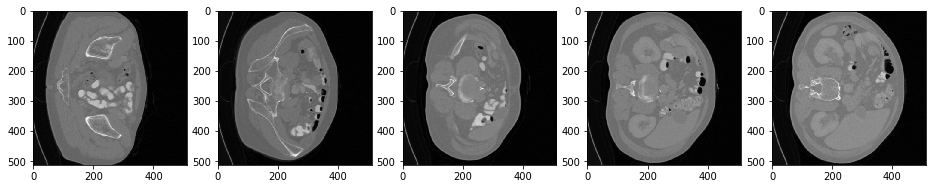

---------- Task05_Prostate ------------------ 
	 Training Data Count : 32
	 Test Data Count: 16
/home/ramesh/Desktop/WS/DecathalonDataset/Task05_Prostate/imagesTr/prostate_24.nii.gz
 Shape :  (320, 320, 20, 2) Slice Index Selected :  [6, 7, 9, 9, 9]


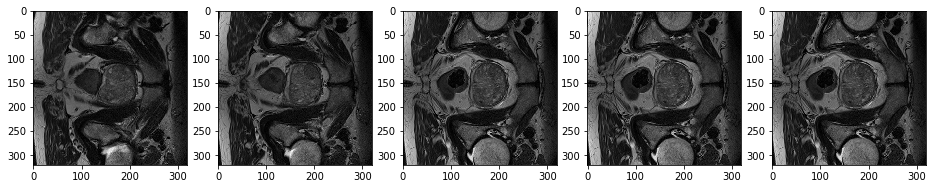

---------- Task10_Colon ------------------ 
	 Training Data Count : 126
	 Test Data Count: 64
/home/ramesh/Desktop/WS/DecathalonDataset/Task10_Colon/imagesTr/colon_038.nii.gz
 Shape :  (512, 512, 41) Slice Index Selected :  [16, 19, 20, 21, 24]


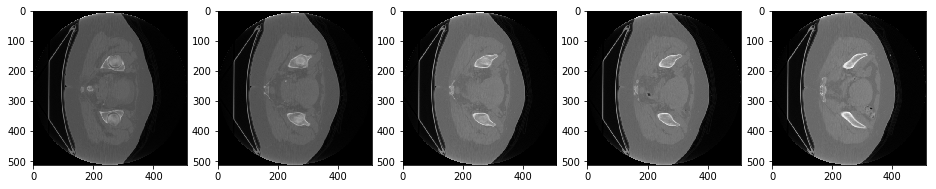

---------- Task02_Heart ------------------ 
	 Training Data Count : 20
	 Test Data Count: 10
/home/ramesh/Desktop/WS/DecathalonDataset/Task02_Heart/imagesTr/la_016.nii.gz
 Shape :  (320, 320, 90) Slice Index Selected :  [28, 44, 55, 61, 62]


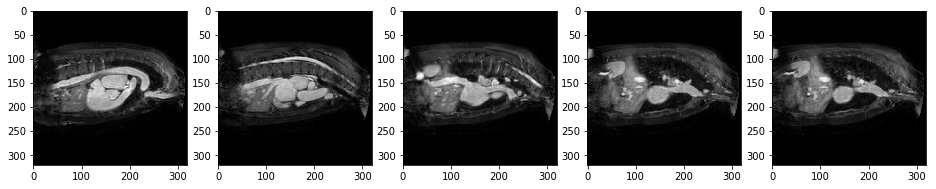

---------- Task04_Hippocampus ------------------ 
	 Training Data Count : 260
	 Test Data Count: 130
/home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTr/hippocampus_295.nii.gz
 Shape :  (35, 53, 36) Slice Index Selected :  [12, 14, 15, 19, 21]


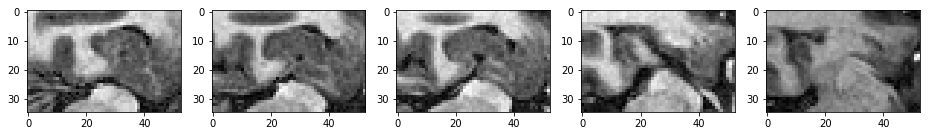

In [13]:
medical_image_data = "/home/ramesh/Desktop/WS/DecathalonDataset/";
training_data_dir = "/imagesTr/";
test_data_dir = "/imagesTs/";
label_data_dir = "/labelsTr/" ;
dir_list = [d for d in os.listdir(medical_image_data) if not d.endswith(".tar")]
print(dir_list)
print("\n")

for directory in dir_list:
    train_dir_path = medical_image_data + directory + training_data_dir;
    test_dir_path =  medical_image_data + directory + test_data_dir;
    label_dir_path = medical_image_data + directory + label_data_dir;
    print("---------- "+ directory+ " ------------------ ")
   # print("train_dir_path :" +train_dir_path)
    
    if os.path.exists(train_dir_path):
        train_list = os.listdir(train_dir_path) # dir is your directory path
        trainCount = len(train_list)
        print("\t Training Data Count : "+str(trainCount))
        
    if os.path.exists(test_dir_path):
        test_list = os.listdir(test_dir_path) # dir is your directory path
        testCount = len(test_list)
        print("\t Test Data Count: "+str(testCount))   
   
    if os.path.exists(label_data_dir):
        label_list = os.listdir(label_data_dir) # dir is your directory path
        labelCount = len(test_list)
        print(" \t Label data count: "+str(labelCount))    
        print(getImageDimention(test_dir_path,test_list[1]))
        
    trainImgList = getImageSliceList(train_dir_path)
    plot_Slices(trainImgList)

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
 DTYPE :  <class 'numpy.ndarray'>
z: 155
[141, 40, 87, 111]
Img Shape : (240, 240)  batchgen1 shape : <class '__main__.DataLoader'>


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


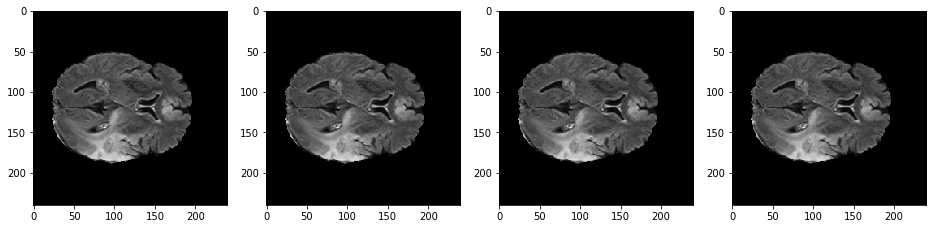

In [14]:
img1 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
batchgen1 = DataLoader(img1, 4)
print("Img Shape :",str(img1.shape)," batchgen1 shape :",type(batchgen1))
batch1 = next(batchgen1)
plot_batch(batch1)

#multithreaded_generator = MultiThreadedAugmenter(batchgen1, all_transforms, 4, 2, seeds=None)

In [15]:
target_size = 64

tranform_list = [# CenterCropTransform(crop_size=target_size),
                         ResizeTransform(target_size=(target_size,target_size), order=1),
                         MirrorTransform(axes=(1,)),
                         SpatialTransform(patch_size=(target_size, target_size), random_crop=False,
                                          patch_center_dist_from_border=target_size // 2,
                                          do_elastic_deform=True, alpha=(0., 900.), sigma=(20., 30.),
                                          do_rotation=True, p_rot_per_sample=0.8,
                                          angle_x=(-15. / 360 * 2. * np.pi, 15. / 360 * 2. * np.pi), angle_y=(0, 1e-8), angle_z=(0, 1e-8),
                                          scale=(0.85, 1.25), p_scale_per_sample=0.8,
                                          border_mode_data="nearest", border_mode_seg="nearest"),
                         ]

all_transforms = Compose(tranform_list)

/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/BRATS_607.nii.gz
 DTYPE :  <class 'numpy.ndarray'>
z: 155
[22, 133, 90, 3]
Img Shape : (240, 240)


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


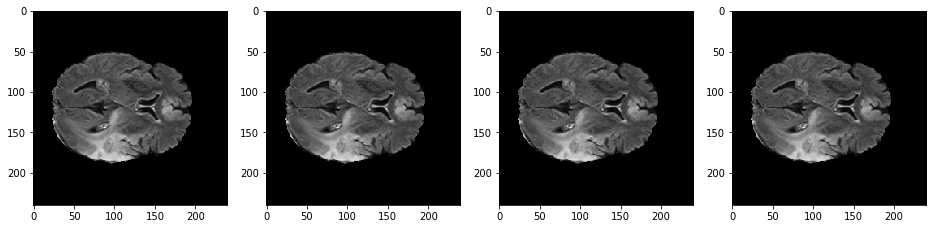

In [16]:
img1 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task01_BrainTumour/imagesTs/")
batchgen1 = DataLoader(img1, 4)
print("Img Shape :",str(img1.shape))
batch1 = next(batchgen1)
plot_batch(batch1)
# you can run this line several times to see different outputs
#plot_batch(next(multithreaded_generator))

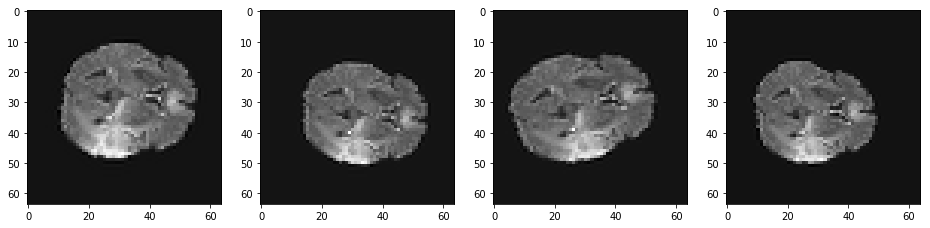

In [17]:
multithreaded_generator_brain = MultiThreadedAugmenter(batchgen1, all_transforms, 4, 2, seeds=None)
# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator_brain))

/home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTs/hippocampus_002.nii.gz
 DTYPE :  <class 'numpy.ndarray'>
z: 36
[16, 1, 8, 33]
Img Shape : (39, 47)


/home/ramesh/Desktop/WS/code/basic_unet_example/src/batchgenerators/batchgenerators/dataloading/data_loader.py:50: DeprecationWarning: This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!
  warn("This DataLoader will soon be removed. Migrate everything to SlimDataLoaderBase now!", DeprecationWarning)


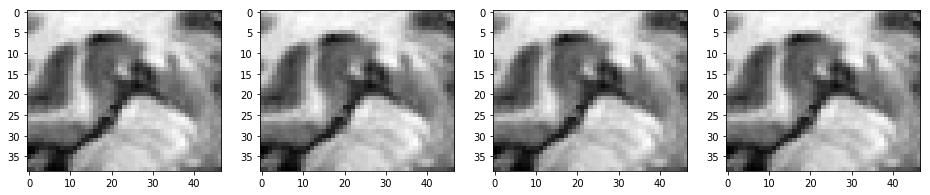

In [18]:
img3 = getImageSlice("/home/ramesh/Desktop/WS/DecathalonDataset/Task04_Hippocampus/imagesTs/")
batchgen3 = DataLoader(img3, 4)
print("Img Shape :",str(img3.shape))
batch3 = next(batchgen3)
plot_batch(batch3)

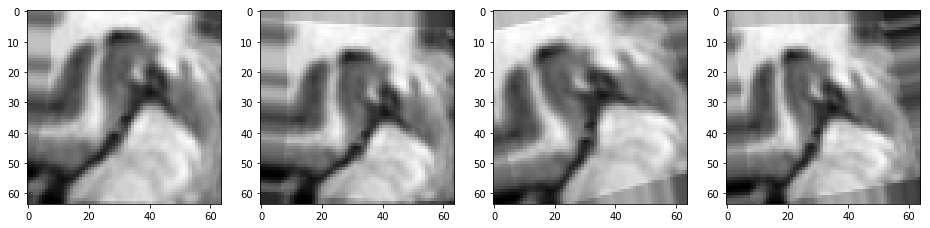

In [19]:
multithreaded_generator_hipp = MultiThreadedAugmenter(batchgen3, all_transforms, 4, 2, seeds=None)
# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator_hipp))

In [26]:
tranform_list1 = [# CenterCropTransform(crop_size=target_size),
                         ResizeTransform(target_size=(target_size,target_size), order=1),
                         MirrorTransform(axes=(1,))
                         ]

all_transforms1 = Compose(tranform_list1)

In [ ]:
multithreaded_generator_hipp1 = MultiThreadedAugmenter(batchgen3, all_transforms1, 4, 2, seeds=None)
# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator_hipp1))

# ResizeTransform + SpatialTransform

In [28]:
tranform_list2 = [# CenterCropTransform(crop_size=target_size),
                         ResizeTransform(target_size=(target_size,target_size), order=1),
                         SpatialTransform(patch_size=(target_size, target_size), random_crop=False,
                                          patch_center_dist_from_border=target_size // 2,
                                          do_elastic_deform=True, alpha=(0., 900.), sigma=(20., 30.),
                                          do_rotation=True, p_rot_per_sample=0.8,
                                          angle_x=(-15. / 360 * 2. * np.pi, 15. / 360 * 2. * np.pi), angle_y=(0, 1e-8), angle_z=(0, 1e-8),
                                          scale=(0.85, 1.25), p_scale_per_sample=0.8,
                                          border_mode_data="nearest", border_mode_seg="nearest")
                         ]

all_transforms2 = Compose(tranform_list2)

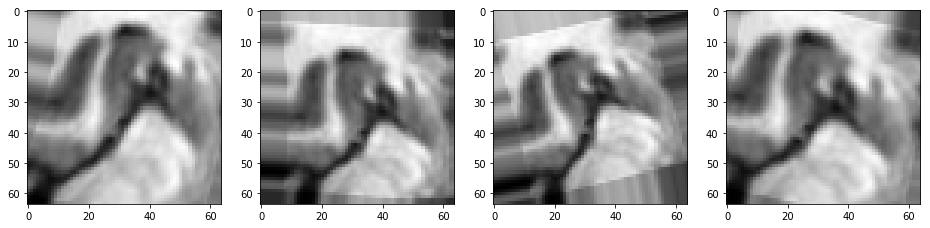

In [29]:
multithreaded_generator_hipp2 = MultiThreadedAugmenter(batchgen3, all_transforms2, 4, 2, seeds=None)
# you can run this line several times to see different outputs
plot_batch(next(multithreaded_generator_hipp2))